# Titanic
![](https://i.imgur.com/rRFchA8.png)

In [ ]:
# „Åì„ÅÆ„Çª„É´„ÇíÂÆüË°å„Åó„Åü„ÅÇ„Å®„Å©„ÅÜ„Åô„Çå„Å∞„ÅÑ„ÅÑ„Åã„Åå„Çè„Åã„Çâ„Å™„ÅÑÊñπ„ÅØ„ÄÅÂà•ÈÄîÈÖçÂ∏É„Åó„Å¶„ÅÑ„Çã„ÄÅNotion„ÅÆ„ÄåGoogle Colab„ÅÆ‰ΩøÁî®ÊñπÊ≥ï„Äç„Çí„ÅîË¶ß„Åè„Å†„Åï„ÅÑ„ÄÇ

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ë™≠„ÅøËæº„ÇÄ„Éá„Éº„Çø„ÅåÊ†ºÁ¥ç„Åï„Çå„Åü„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅÆ„Éë„ÇπÔºåÂøÖË¶Å„Å´Âøú„Åò„Å¶Â§âÊõ¥„ÅÆÂøÖË¶Å„ÅÇ„Çä
# „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„ÅøÊñπ„Åå„Çè„Åã„Çâ„Å™„ÅÑÊñπ„ÅØ„ÄÅÂà•ÈÄîÈÖçÂ∏É„Åó„Å¶„ÅÑ„Çã„ÄÅNotion„ÅÆ„ÄåGoogle Colab„ÅÆ‰ΩøÁî®ÊñπÊ≥ï„Äç„Çí„ÅîË¶ß„Åè„Å†„Åï„ÅÑ„ÄÇ
path =  '/content/drive/MyDrive/GCI 2025 Summer/02.„Ç≥„É≥„Éò„Çö1/'

df = pd.read_csv(path + 'data/train.csv')
df_test = pd.read_csv(path + 'data/test.csv')

In [ ]:
print(df.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [ ]:
print('Ë®ìÁ∑¥„Éá„Éº„Çø„ÅÆ„Éá„Éº„ÇøÊï∞„ÅØ{}„ÄÅÂ§âÊï∞„ÅØ{}Á®ÆÈ°û„Åß„Åô„ÄÇ'.format(df.shape[0], df.shape[1]))
print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ„Éá„Éº„ÇøÊï∞„ÅØ{}„ÄÅÂ§âÊï∞„ÅØ{}Á®ÆÈ°û„Åß„Åô'.format(df_test.shape[0], df_test.shape[1]))

Ë®ìÁ∑¥„Éá„Éº„Çø„ÅÆ„Éá„Éº„ÇøÊï∞„ÅØ891„ÄÅÂ§âÊï∞„ÅØ12Á®ÆÈ°û„Åß„Åô„ÄÇ
„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ„Éá„Éº„ÇøÊï∞„ÅØ418„ÄÅÂ§âÊï∞„ÅØ11Á®ÆÈ°û„Åß„Åô


In [ ]:
df.head()

PassengerId  Perished  Pclass  \
0             1         1       3   
1             2         0       1   
2             3         0       3   
3             4         0       1   
4             5         1       3   
5             6         1       3   
6             7         1       1   
7             8         1       3   
8             9         0       3   
9            10         0       2   
10           11         0       3   
11           12         0       1   
12           13         1       3   
13           14         1       3   
14           15         1       3   
15           16         0       2   
16           17         1       3   
17           18         0       2   
18           19         1       3   
19           20         0       3   

                                                 Name     Sex        Age  \
0                             Braund, Mr. Owen Harris    male  22.000000   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                              Heikkinen, Miss. Laina  female  26.000000   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                            Allen, Mr. William Henry    male  35.000000   
5                                    Moran, Mr. James    male  32.252151   
6                             McCarthy, Mr. Timothy J    male  54.000000   
7                      Palsson, Master. Gosta Leonard    male   2.000000   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                    Sandstrom, Miss. Marguerite Rut  female   4.000000   
11                           Bonnell, Miss. Elizabeth  female  58.000000   
12                     Saundercock, Mr. William Henry    male  20.000000   
13                        Andersson, Mr. Anders Johan    male  39.000000   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.000000   
16                               Rice, Master. Eugene    male   2.000000   
17                       Williams, Mr. Charles Eugene    male  32.252151   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
19                            Masselmani, Mrs. Fatima  female  36.994118   

    SibSp  Parch            Ticket     Fare Embarked   Title  
0       1      0         A/5 21171   7.2500        S      Mr  
1       1      0          PC 17599  71.2833        C     Mrs  
2       0      0  STON/O2. 3101282   7.9250        S    Miss  
3       1      0            113803  53.1000        S     Mrs  
4       0      0            373450   8.0500        S      Mr  
5       0      0            330877   8.4583        Q      Mr  
6       0      0             17463  51.8625        S      Mr  
7       3      1            349909  21.0750        S  Master  
8       0      2            347742  11.1333        S     Mrs  
9       1      0            237736  30.0708        C     Mrs  
10      1      1           PP 9549  16.7000        S    Miss  
11      0      0            113783  26.5500        S    Miss  
12      0      0         A/5. 2151   8.0500        S      Mr  
13      1      5            347082  31.2750        S      Mr  
14      0      0            350406   7.8542        S    Miss  
15      0      0            248706  16.0000        S     Mrs  
16      4      1            382652  29.1250        Q  Master  
17      0      0            244373  13.0000        S      Mr  
18      1      0            345763  18.0000        S     Mrs  
19      0      0              2649   7.2250        C     Mrs

In [ ]:
df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

„ÄÄ„Åì„Çå„Çâ„ÅÆÂ§âÊï∞Âêç„Çí„ÄÅREADME.ipynb„Å´Á§∫„Åï„Çå„ÅüÂ§âÊï∞„ÅÆË™¨Êòé„Å®ÂØæÂøú‰ªò„Åë„Å¶„Åä„Åç„Åæ„Åó„Çá„ÅÜ„ÄÇ  

Â§âÊï∞ |ÂÆöÁæ© |ÂÇôËÄÉ  
---|---|---
Perished |Ê≠ª‰∫°„Åó„Åü„Åã„Å©„ÅÜ„Åã |0 = No, 1 = Yes
Pclass |„ÉÅ„Ç±„ÉÉ„Éà„ÅÆ„ÇØ„É©„Çπ |1 = 1st, 2 = 2nd, 3 = 3rd
Name |ÂêçÂâç |
Sex |ÊÄßÂà• |
Age	|Âπ¥ÈΩ¢ |
SibSp |‰πóËàπ„Åó„Å¶„ÅÑ„ÅüÂÖÑÂºüÂßâÂ¶π„ÉªÈÖçÂÅ∂ËÄÖ„ÅÆÊï∞	|
Parch |‰πóËàπ„Åó„Å¶„ÅÑ„ÅüË¶™„ÉªÂ≠ê‰æõ„ÅÆÊï∞	|
Ticket |„ÉÅ„Ç±„ÉÉ„ÉàÁï™Âè∑	|
Fare |„ÉÅ„Ç±„ÉÉ„ÉàÊñôÈáë	|
Cabin |„Ç≠„É£„Éì„É≥Áï™Âè∑	|
embarked |‰πóËàπ„Åó„ÅüÊ∏Ø	|C = Cherbourg, Q = Queenstown, S = Southampton



### **EDA**

In [ ]:
# Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç
df.isnull().sum()

PassengerId      0
Perished         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

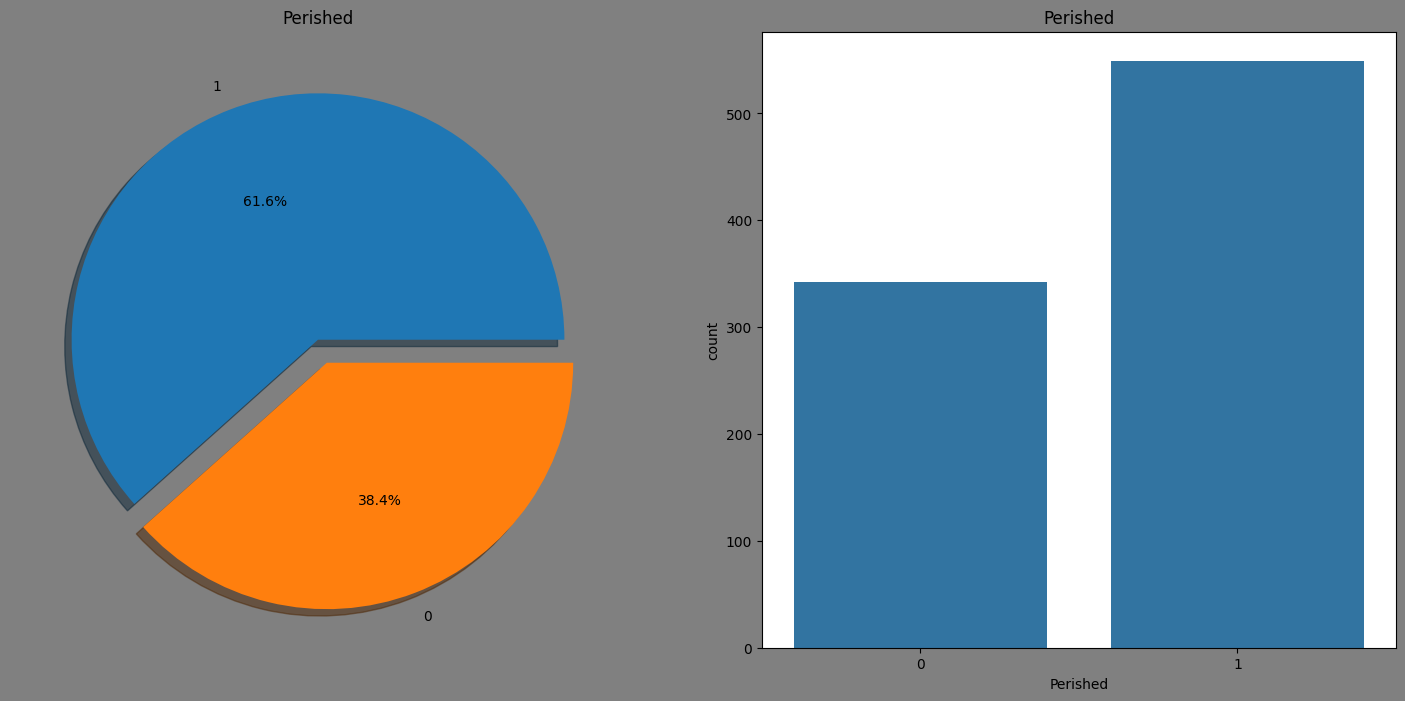

In [ ]:
# Perished„ÅÆÂÜÖË®≥
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Perished'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Perished')
ax[0].set_ylabel('')

sns.countplot(x='Perished',data=df,ax=ax[1])
ax[1].set_title('Perished')
plt.show()

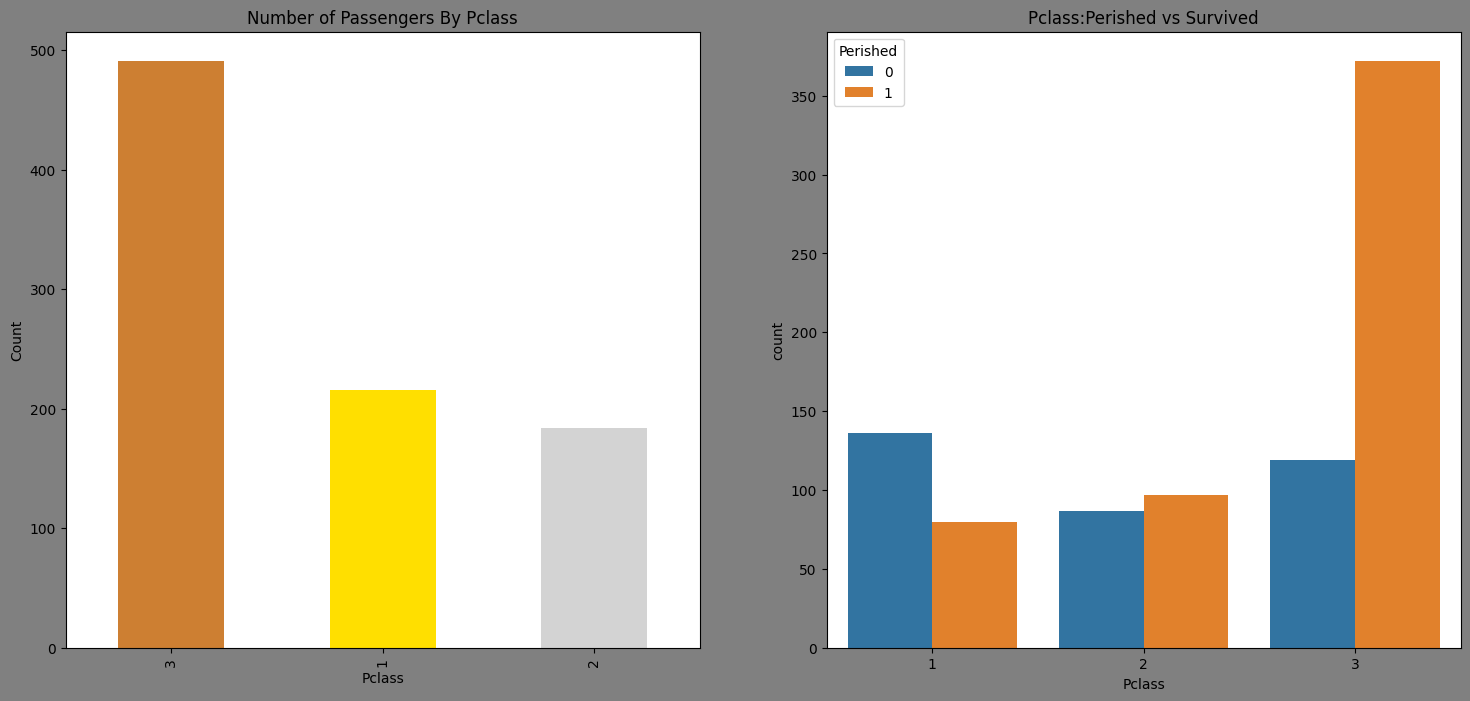

In [ ]:
# Pclass„Å´ÁùÄÁõÆ
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Perished',data=df,ax=ax[1])
ax[1].set_title('Pclass:Perished vs Survived')
plt.show()

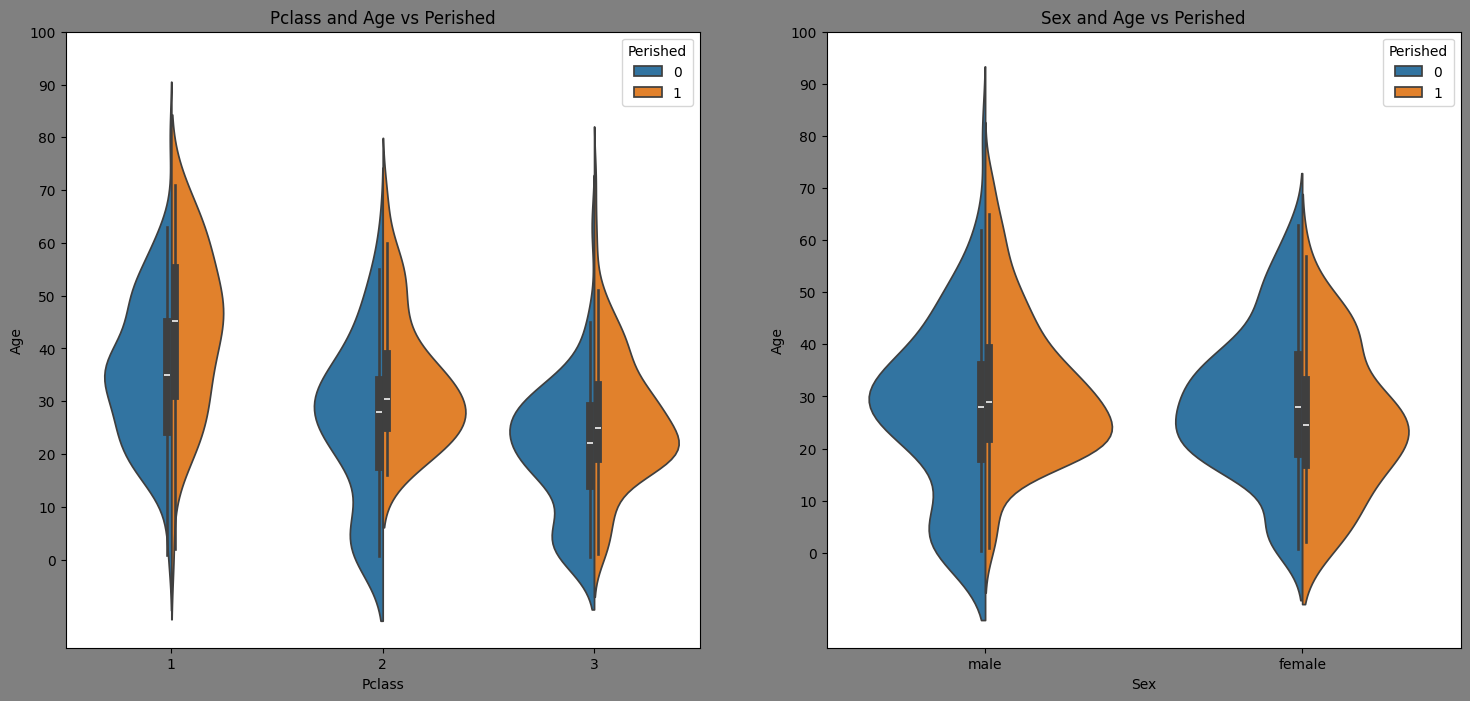

In [ ]:
# Age„Å´ÁùÄÁõÆ
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
sns.violinplot(x="Pclass",y="Age", hue="Perished", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Perished')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Perished", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Perished')
ax[1].set_yticks(range(0,110,10))
plt.show()

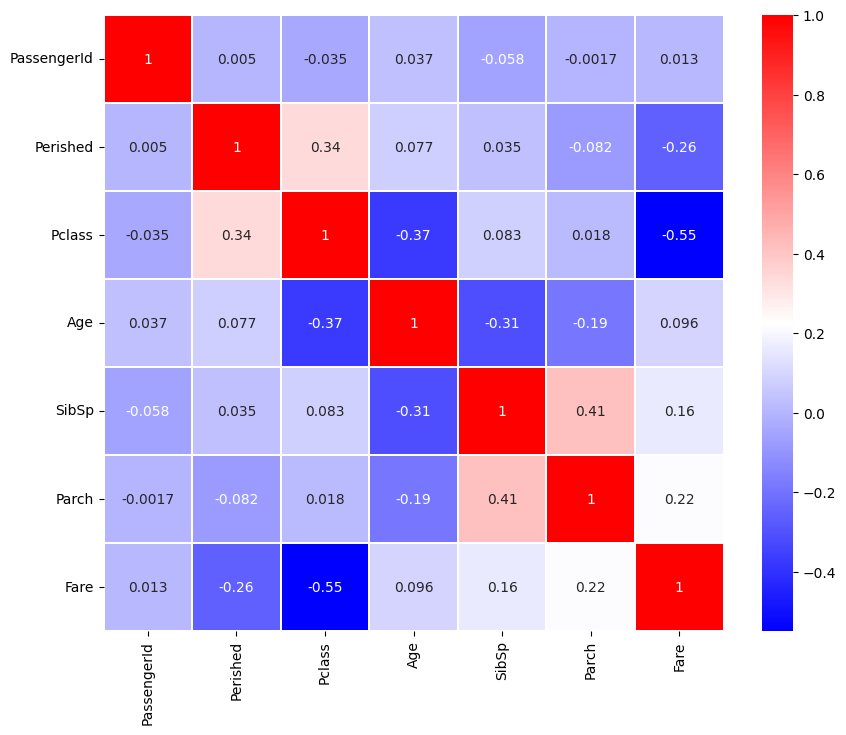

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='bwr',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## **1. „Éá„Éº„Çø„ÅÆÂá¶ÁêÜ**

### **Ê¨†ÊêçÂÄ§„ÅÆÂá¶ÁêÜ**

In [ ]:
# 'Age' „ÇíÊï¨Áß∞„ÇíËÄÉÊÖÆ„Åó„Å¶Ë£úÂÆå
import re

def extract_title(df_row):
    name = df_row['Name']
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        title = title_search.group(1)
        titles_to_keep = ['Mr', 'Miss', 'Mrs', 'Master']
        if title in titles_to_keep:
            return title
        else:
            return 'Other'
    return 'Other' # Êï¨Áß∞„ÅåË¶ã„Å§„Åã„Çâ„Å™„ÅÑÂ†¥Âêà„ÇÇ 'Other' „Å®„Åô„Çã

# ‰ΩøÁî®‰æãÔºöÊñ∞„Åó„ÅÑ 'Title' „Ç´„É©„É†„Çí‰ΩúÊàê„Åô„Çã
df['Title'] = df.apply(extract_title, axis=1)
df_test['Title'] = df_test.apply(extract_title, axis=1)

# df„Å®df_test„Åù„Çå„Åû„Çå„ÅÆË©≤ÂΩì„Åô„ÇãTitle„ÅÆAge„ÅÆÊ¨†ÊêçÂÄ§„ÇíÂπ≥ÂùáÂÄ§„ÅßË£úÂÆå
for title in df['Title'].unique():
    age = pd.concat([df[df['Title'] == title]['Age'], df_test[df_test['Title'] == title]['Age']])
    mean_age = age.mean()

    df.loc[df['Title'] == title, 'Age'] = df.loc[df['Title'] == title, 'Age'].fillna(mean_age)
    df_test.loc[df_test['Title'] == title, 'Age'] = df_test.loc[df_test['Title'] == title, 'Age'].fillna(mean_age)

    print(f"Title: {title}, Âπ≥ÂùáÂπ¥ÈΩ¢ (df+df_test): {mean_age:.2f}")

# Ê¨†ÊêçÂÄ§„ÅåÂüã„Åæ„Å£„Åü„ÅãÁ¢∫Ë™ç
print("\nÊ¨†ÊêçÂÄ§Á¢∫Ë™ç (df):")
print(df.isnull().sum())
print("\nÊ¨†ÊêçÂÄ§Á¢∫Ë™ç (df_test):")
print(df_test.isnull().sum())

'''
memo
'''
# „É¥„Ç°„Ç§„Ç™„É™„É≥„ÉÅ„É£„Éº„Éà
# sns.violinplot(x="Title",y="Age", hue="Perished", data=df,split=True)
# plt.show()

# ÁµêÊûú„ÇíÁ¢∫Ë™ç
# print(df['Title'].value_counts())

Title: Mr, Âπ≥ÂùáÂπ¥ÈΩ¢ (df+df_test): 32.25
Title: Mrs, Âπ≥ÂùáÂπ¥ÈΩ¢ (df+df_test): 36.99
Title: Miss, Âπ≥ÂùáÂπ¥ÈΩ¢ (df+df_test): 21.77
Title: Master, Âπ≥ÂùáÂπ¥ÈΩ¢ (df+df_test): 5.48
Title: Other, Âπ≥ÂùáÂπ¥ÈΩ¢ (df+df_test): 42.66

Ê¨†ÊêçÂÄ§Á¢∫Ë™ç (df):
PassengerId      0
Perished         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Ê¨†ÊêçÂÄ§Á¢∫Ë™ç (df_test):
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


'\nmemo\n'

In [ ]:
# 'Fare' „ÇíË£úÂÆå
fare = pd.concat([df['Fare'], df_test['Fare']])

df['Fare'].fillna(fare.mean(), inplace=True)
df_test['Fare'].fillna(fare.mean(), inplace=True)

df.isnull().sum()

PassengerId      0
Perished         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
# 'Cabin' „ÇíÂâäÈô§
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

PassengerId    0
Perished       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64

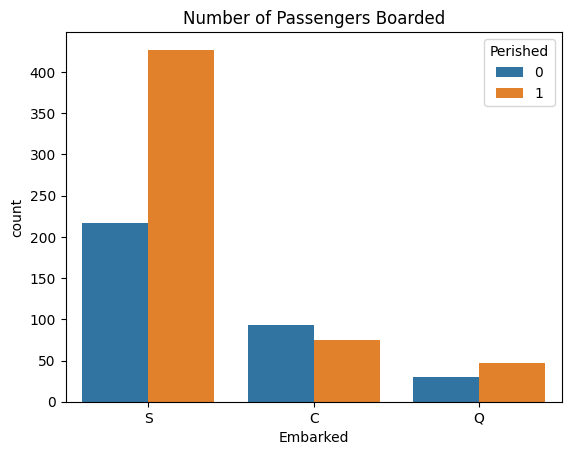

PassengerId    0
Perished       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [ ]:
# 'Embarked' „ÇíË£úÂÆå
sns.countplot(x='Embarked', hue='Perished', data=df)
plt.title('Number of Passengers Boarded')
plt.show()

df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df.isnull().sum()

### **„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„ÅÆÂá¶ÁêÜ**

In [ ]:
# 'Ticket' „ÅÆÂâäÈô§
df.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [ ]:
# 'Sex' „ÅÆÊï∞ÂÄ§Âåñ
df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Title', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
# 'Embarked' „ÅÆ„Éê„Ç§„Éä„É™Âåñ
embarked = pd.concat([df['Embarked'], df_test['Embarked']])

embarked_ohe = pd.get_dummies(embarked)

embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_test = embarked_ohe[891:]

df = pd.concat([df, embarked_ohe_train], axis=1)
df_test = pd.concat([df_test, embarked_ohe_test], axis=1)

df.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Title', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
# 'Name' „ÅÆÂâäÈô§
df.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Title', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
# 'Title' „ÅÆ„Éê„Ç§„Éä„É™Âåñ
title = pd.concat([df['Title'], df_test['Title']])

title_ohe = pd.get_dummies(title)

title_ohe_train = title_ohe[:891]
title_ohe_test = title_ohe[891:]

df = pd.concat([df, title_ohe_train], axis=1)
df_test = pd.concat([df_test, title_ohe_test], axis=1)

df.drop('Title', axis=1, inplace=True)
df_test.drop('Title', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Other'],
      dtype='object')

In [ ]:
'''
memo
df1ÔºöÊ¨†ÊêçÂÄ§„Éª„Ç´„ÉÜ„Ç¥„É™„Ç´„É´„Éá„Éº„Çø„ÅÆÂá¶ÁêÜ
'''
df1 = df.copy()
df_test1 = df_test.copy()

df1.columns

PassengerId  Perished  Pclass  Sex   Age  SibSp  Parch     Fare      C  \
0            1         1       3    0  22.0      1      0   7.2500  False   
1            2         0       1    1  38.0      1      0  71.2833   True   
2            3         0       3    1  26.0      0      0   7.9250  False   
3            4         0       1    1  35.0      1      0  53.1000  False   
4            5         1       3    0  35.0      0      0   8.0500  False   

       Q      S  Master   Miss     Mr    Mrs  Other  
0  False   True   False  False   True  False  False  
1  False  False   False  False  False   True  False  
2  False   True   False   True  False  False  False  
3  False   True   False  False  False   True  False  
4  False   True   False  False   True  False  False

In [ ]:
df1.head()

PassengerId  Perished  Pclass  Sex   Age  SibSp  Parch     Fare      C  \
0            1         1       3    0  22.0      1      0   7.2500  False   
1            2         0       1    1  38.0      1      0  71.2833   True   
2            3         0       3    1  26.0      0      0   7.9250  False   
3            4         0       1    1  35.0      1      0  53.1000  False   
4            5         1       3    0  35.0      0      0   8.0500  False   

       Q      S  Master   Miss     Mr    Mrs  Other  
0  False   True   False  False   True  False  False  
1  False  False   False  False  False   True  False  
2  False   True   False   True  False  False  False  
3  False   True   False  False  False   True  False  
4  False   True   False  False   True  False  False

### **ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞**


üåü 'Sex' „ÅØ'Title' „ÅßË°®Áèæ„Åß„Åç„Çã„ÄÇ


In [ ]:
'''
memo
'Sex' „ÅØ'Title' „ÅßË°®Áèæ„Åß„Åç„Çã„ÄÇ
'''
# „Éê„Ç§„Éä„É™TitleÂàó„Å® 'Sex' „ÅÆÈñ¢‰øÇÊÄß„ÇíÈõÜË®à
title_sex_relation = pd.DataFrame()

for title_col in ['Master', 'Miss', 'Mr', 'Mrs', 'Other']:
    # ÂêÑTitleÂàó„Åå1„ÅÆ„Éá„Éº„Çø„ÅÆ„Åø„ÇíÊäΩÂá∫„Åó„ÄÅSex„Åß„Ç∞„É´„Éº„ÉóÂåñ„Åó„Å¶‰∫∫Êï∞„Çí„Ç´„Ç¶„É≥„Éà
    temp_df = df[df[title_col] == 1].groupby('Sex').size().reset_index(name='Count')
    temp_df['Title'] = title_col # TitleÂàó„ÇíËøΩÂä†
    title_sex_relation = pd.concat([title_sex_relation, temp_df])

# ÊÄßÂà•„ÇíÊï∞ÂÄ§„Åã„ÇâÂêçÂâç„Å´Â§âÊèõ („ÇÇ„ÅóÊï∞ÂÄ§Âåñ„Åï„Çå„Å¶„ÅÑ„ÇãÂ†¥Âêà)
if df['Sex'].dtype == 'int64' or df['Sex'].dtype == 'float64':
     title_sex_relation['Sex_Label'] = title_sex_relation['Sex'].map({0: 'male', 1: 'female'})
else:
    title_sex_relation['Sex_Label'] = title_sex_relation['Sex']

# Ê£í„Ç∞„É©„Éï„ÅßÂèØË¶ñÂåñ
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Count', hue='Sex_Label', data=title_sex_relation)
plt.title('Number of Passengers by Title Category and Sex')
plt.xlabel('Title Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # „É©„Éô„É´„ÅåË¶ã„ÇÑ„Åô„ÅÑ„Çà„ÅÜ„Å´ÂõûËª¢
plt.tight_layout()
plt.show()

Index(['PassengerId', 'Perished', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Other'],
      dtype='object')

In [ ]:
# 'Sex' „ÅÆÂâäÈô§
df.drop('Sex', axis=1, inplace=True)
df_test.drop('Sex', axis=1, inplace=True)

df.columns

üåü 'SibSp', 'Parch' „ÇíÂ§âÂΩ¢„Åô„Çã

In [ ]:
# 'Family' ‰ΩúÊàê
df['Family'] = df['SibSp'] + df['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']

df.drop('SibSp', axis=1, inplace=True)
df_test.drop('SibSp', axis=1, inplace=True)

df.drop('Parch', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)

'''
memo
„Éª4‰∫∫ÂÆ∂Êóè‰ª•‰∏ä„ÅØÁîüÂ≠òÁéá‰Ωé„ÅÑÔºü
'''
# print(df['Family'].value_counts())

# Ê£í„Ç∞„É©„ÉïÔºöÂÆ∂Êóè„ÅÆÊï∞„Å®Ê≠ª‰∫°Áéá„ÅÆÈñ¢‰øÇ
# sns.countplot(x='Family', hue='Perished', data=df)
# plt.show()

# 'Family_Group' ‰ΩúÊàê
bins = [-1, 0, 3, df['Family'].max()]
labels = ['Alone', 'Small_Family', 'Large_Family']

df['Family_Group'] = pd.cut(df['Family'], bins=bins, labels=labels, right=True)
df_test['Family_Group'] = pd.cut(df_test['Family'], bins=bins, labels=labels, right=True)

print(df['Family_Group'].value_counts())

# 'Family_Group' „ÅÆÊï∞ÂÄ§Âåñ
family = pd.concat([df['Family_Group'], df_test['Family_Group']])

family_ohe = pd.get_dummies(family)

family_ohe_train = family_ohe[:891]
family_ohe_test = family_ohe[891:]

df = pd.concat([df, family_ohe_train], axis=1)
df_test = pd.concat([df_test, family_ohe_test], axis=1)

df.drop('Family', axis=1, inplace=True)
df_test.drop('Family', axis=1, inplace=True)

df.drop('Family_Group', axis=1, inplace=True)
df_test.drop('Family_Group', axis=1, inplace=True)

Family_Group
Alone           537
Small_Family    292
Large_Family     62
Name: count, dtype: int64


PassengerId  Perished  Pclass   Age     Fare      C      Q      S  Master  \
0            1         1       3  22.0   7.2500  False  False   True   False   
1            2         0       1  38.0  71.2833   True  False  False   False   
2            3         0       3  26.0   7.9250  False  False   True   False   
3            4         0       1  35.0  53.1000  False  False   True   False   
4            5         1       3  35.0   8.0500  False  False   True   False   

    Miss     Mr    Mrs  Other  Alone  Small_Family  Large_Family  
0  False   True  False  False  False          True         False  
1  False  False   True  False  False          True         False  
2   True  False  False  False   True         False         False  
3  False  False   True  False  False          True         False  
4  False   True  False  False   True         False         False

üåü 'Fare' „ÅÆÂá¶ÁêÜ

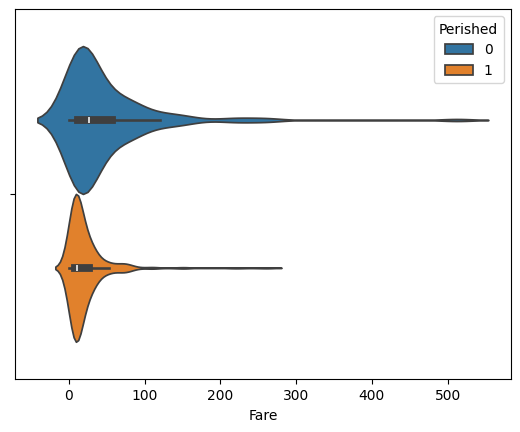

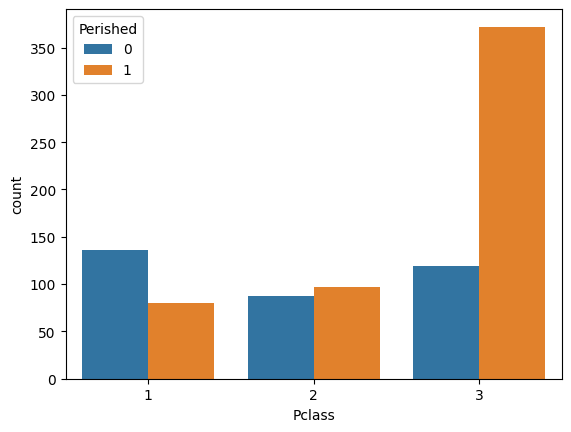

In [ ]:
sns.violinplot(x='Fare', hue='Perished', data=df2)
plt.show()

sns.countplot(x='Pclass', hue='Perished', data=df2)
plt.show()

In [ ]:
# Fare„Çí4„Å§„ÅÆ‰æ°Ê†ºÂ∏Ø„Å´ÂàÜ„Åë„ÇãÔºàqcut„ÅØ„Éá„Éº„ÇøÊï∞„ÇíÂü∫Ê∫ñ„Å´ÂàÜÂâ≤Ôºâ
df['Fare_Bin'] = pd.qcut(df['Fare'], 4, labels=['Very_Low', 'Low', 'High', 'Very_High'])
df_test['Fare_Bin'] = pd.qcut(df_test['Fare'], 4, labels=['Very_Low', 'Low', 'High', 'Very_High'])

# „Ç´„ÉÜ„Ç¥„É™„Çí„Éê„Ç§„Éä„É™Âåñ
fare_bin = pd.concat([df['Fare_Bin'], df_test['Fare_Bin']])

fare_bin_ohe = pd.get_dummies(fare_bin)

fare_bin_ohe_train = fare_bin_ohe[:891]
fare_bin_ohe_test = fare_bin_ohe[891:]

df = pd.concat([df, fare_bin_ohe_train], axis=1)
df_test = pd.concat([df_test, fare_bin_ohe_test], axis=1)

df.drop('Fare', axis=1, inplace=True)
df_test.drop('Fare', axis=1, inplace=True)

df.drop('Fare_Bin', axis=1, inplace=True)
df_test.drop('Fare_Bin', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Age', 'C', 'Q', 'S', 'Master',
       'Miss', 'Mr', 'Mrs', 'Other', 'Alone', 'Small_Family', 'Large_Family',
       'Fare_Bin', 'Very_Low', 'Low', 'High', 'Very_High'],
      dtype='object')

In [ ]:
'''
memo
‰∏ÄÊó¶„ÄÅ„Åì„Åì„Åæ„Åß„ÅÆÂá¶ÁêÜÊ∏à„Åø„Éá„Éº„Çø„ÇíÁΩÆ„ÅÑ„Å¶„Åä„Åç„Åæ„Åô„ÄÇ
'''
df2 = df.copy()
df_test2 = df_test.copy()

df2.columns
df2.head()

PassengerId  Perished  Pclass   Age      C      Q      S  Master   Miss  \
0            1         1       3  22.0  False  False   True   False  False   
1            2         0       1  38.0   True  False  False   False  False   
2            3         0       3  26.0  False  False   True   False   True   
3            4         0       1  35.0  False  False   True   False  False   
4            5         1       3  35.0  False  False   True   False  False   

      Mr    Mrs  Other  Alone  Small_Family  Large_Family  Very_Low    Low  \
0   True  False  False  False          True         False      True  False   
1  False   True  False  False          True         False     False  False   
2  False  False  False   True         False         False     False   True   
3  False   True  False  False          True         False     False  False   
4   True  False  False   True         False         False     False   True   

    High  Very_High  
0  False      False  
1  False       True  
2  False      False  
3  False       True  
4  False      False

üåü **ÁâπÂæ¥ÈáèÈÅ∏Êäû**

ÈÅéÂ≠¶Áøí„ÇíÊäë„Åà„Çã„Åü„ÇÅ„Å´„ÄÇ„ÄÇ

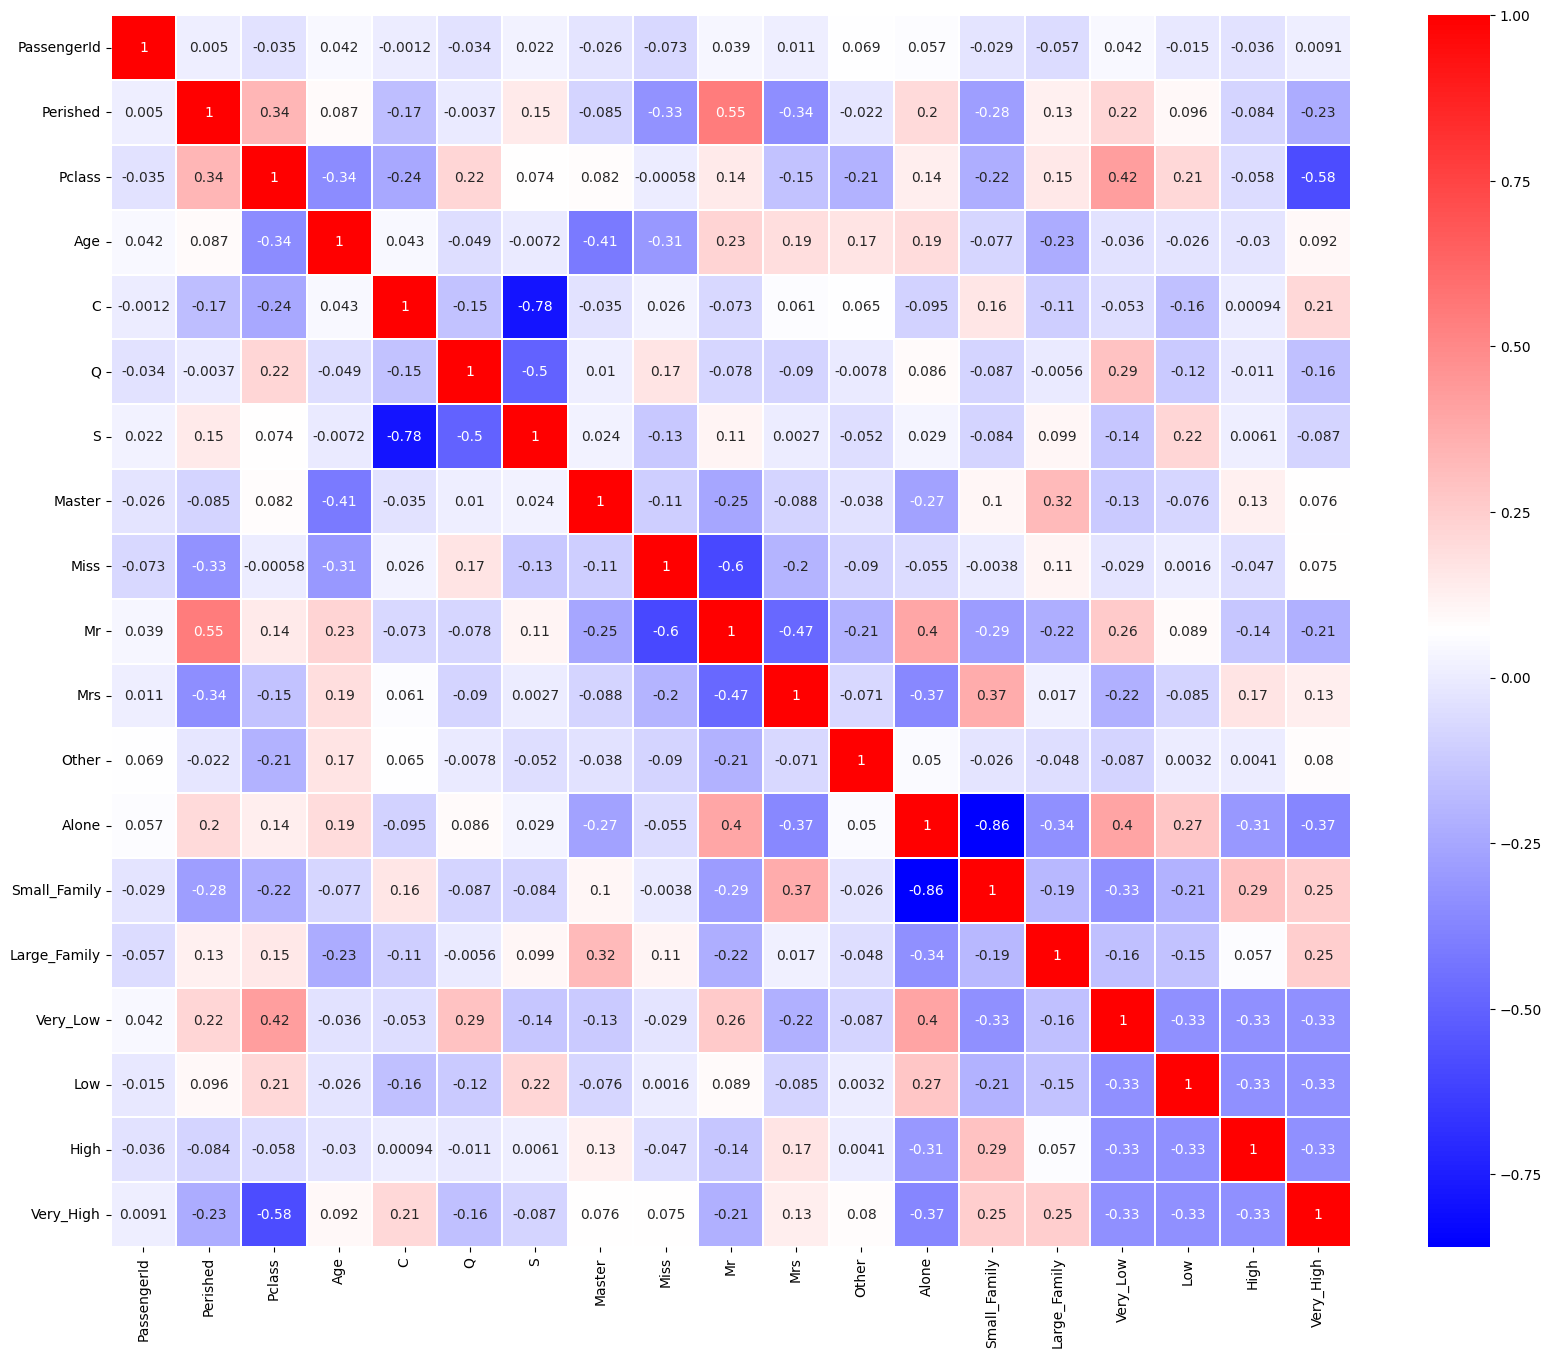

In [ ]:
'''
memo
ÁâπÂæ¥Èáè„ÅÆÈáçË§á„ÇíÁ¢∫Ë™ç
'''
df_numeric = df.select_dtypes(include=['number', 'bool'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='bwr',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()

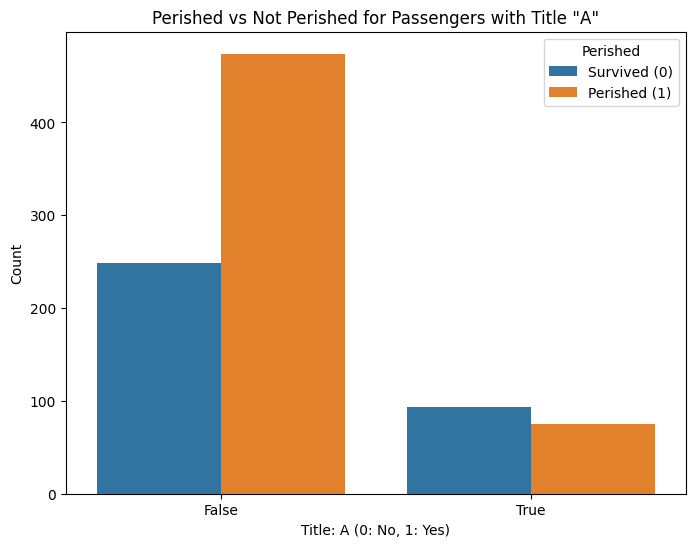

In [ ]:
# prompt: 'A'„Å®'Perished'„ÅÆÈñ¢‰øÇ„Çí„Ç∞„É©„ÉïÂåñ„Åó„Åü„ÅÑ„ÄÇ

# 'A' „Å® 'Perished' „ÅÆÈñ¢‰øÇ„Çí„Ç∞„É©„ÉïÂåñ
plt.figure(figsize=(8, 6))
sns.countplot(x='C', hue='Perished', data=df)
plt.title('Perished vs Not Perished for Passengers with Title "A"')
plt.xlabel('Title: A (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Perished', labels=['Survived (0)', 'Perished (1)'])
plt.show()


In [ ]:
# ÁâπÂæ¥ÈáèÈÅ∏Êäû
df3 = df2.copy()
df_test3 = df_test2.copy()

columns_to_drop = ['Master', 'Q', 'Other', 'Low', 'High', 'Alone']

for col in columns_to_drop:
    if col in df3.columns:
        df3.drop(col, axis=1, inplace=True)
    if col in df_test3.columns:
        df_test3.drop(col, axis=1, inplace=True)

df3.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Age', 'C', 'S', 'Miss', 'Mr',
       'Mrs', 'Small_Family', 'Large_Family', 'Very_Low', 'Very_High'],
      dtype='object')

## **2. „Éô„Éº„Çπ„É©„Ç§„É≥„É¢„Éá„É´„ÅÆÊßãÁØâ**

In [ ]:
df0 = df3.copy()
df_test0 = df_test3.copy()

In [ ]:
# Ë™¨ÊòéÂ§âÊï∞„Å®ÁõÆÁöÑÂ§âÊï∞„Å´ÂàÜ„Åë„Çã
X = df0.iloc[:, 2:].values
y = df0.iloc[:, 1].values

X_test = df_test0.iloc[:, 1:].values

# Êì¨‰ººË®ìÁ∑¥„Éá„Éº„Çø„ÅÆ‰ΩúÊàêÔºà„Éõ„Éº„É´„Éâ„Ç¢„Ç¶„ÉàÊ≥ïÔºöÈÅéÂ≠¶ÁøíÂØæÁ≠ñÔºâ
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÅÆ‰ΩúÊàê
# Ë®ìÁ∑¥„Éá„Éº„Çø„ÇíÂ≠¶Áøí„Åï„Åõ„Çã
rfc = RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.846
 Test Score: 0.813


**„Ç∞„É™„ÉÉ„Éâ„É™„Çµ„Éº„ÉÅ**
ÔºöÈÅ©Âàá„Å™„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„Çø„ÇíË¶ã„Å§„Åë„Çã„ÄÇ

In [ ]:
# „Ç∞„É™„ÉÉ„Éâ„É™„Çµ„Éº„ÉÅ„Å®CV„ÅÆËá™ÂãïÂåñ
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2}
CV Score: 0.834


In [ ]:
# „Ç∞„É™„ÉÉ„Éâ„É™„Çµ„Éº„ÉÅÔºàÊâãÂãïÔºâ
param_grid = {'max_depth': [3, 5, 7],
              'min_samples_leaf': [1, 2, 4]}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        rfc_grid = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                            n_estimators=100, n_jobs=-1, random_state=42)
        rfc_grid.fit(X_train, y_train)
        print('max_depth: {}, min_samples_leaf: {}'.format(max_depth, min_samples_leaf))
        print('    Train Score: {}, Test Score: {}'.format(round(rfc_grid.score(X_train, y_train), 3),
                                                           round(rfc_grid.score(X_valid, y_valid), 3)))

max_depth: 3, min_samples_leaf: 1
    Train Score: 0.831, Test Score: 0.821
max_depth: 3, min_samples_leaf: 2
    Train Score: 0.828, Test Score: 0.821
max_depth: 3, min_samples_leaf: 4
    Train Score: 0.831, Test Score: 0.813
max_depth: 5, min_samples_leaf: 1
    Train Score: 0.857, Test Score: 0.802
max_depth: 5, min_samples_leaf: 2
    Train Score: 0.852, Test Score: 0.799
max_depth: 5, min_samples_leaf: 4
    Train Score: 0.846, Test Score: 0.813
max_depth: 7, min_samples_leaf: 1
    Train Score: 0.886, Test Score: 0.795
max_depth: 7, min_samples_leaf: 2
    Train Score: 0.872, Test Score: 0.791
max_depth: 7, min_samples_leaf: 4
    Train Score: 0.857, Test Score: 0.799


**ÁâπÂæ¥ÈáèÈÅ∏Êäû„ÅÆ„Éí„É≥„Éà**

         Feature  Importance
5             Mr    0.336362
0         Pclass    0.136765
6            Mrs    0.132374
4           Miss    0.101240
1            Age    0.097264
7   Small_Family    0.048133
8   Large_Family    0.047568
3              S    0.026785
10     Very_High    0.026771
2              C    0.024926
9       Very_Low    0.021812


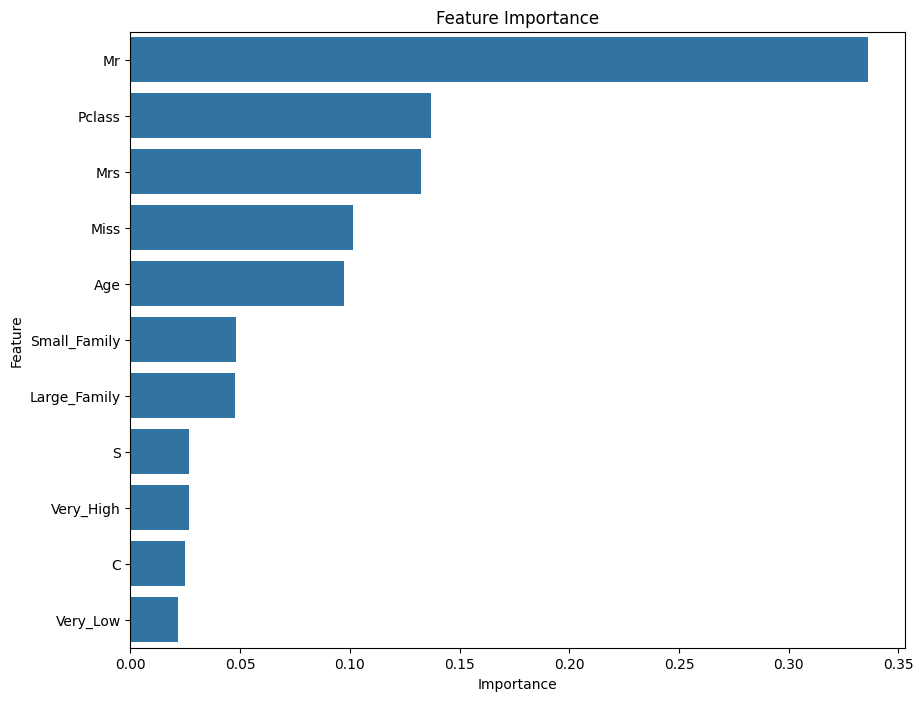

In [ ]:
# ÈáçË¶Å„Åß„Å™„ÅÑÁâπÂæ¥Èáè„ÇíË¶ã„Å§„Åë„Çã
importances = rfc.feature_importances_
feature_names = df3.columns[2:]

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# „Ç∞„É©„Éï
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## **4. Êßò„ÄÖ„Å™„É¢„Éá„É´„ÅÆÊßãÁØâ„ÉªË™øÊï¥**
Ê©üÊ¢∞Â≠¶Áøí„ÇíÁî®„ÅÑ„Åü„Éá„Éº„ÇøÂàÜÊûê„Åß„ÅØ„ÄÅÁî®„ÅÑ„ÇãÊ©üÊ¢∞Â≠¶Áøí„É¢„Éá„É´„ÇíÂ§öÊßòÂåñ„Åó„ÄÅ**„Ç¢„É≥„Çµ„É≥„Éñ„É™„É≥„Ç∞**„Åô„Çã„Åì„Å®„Å´„Çà„Å£„Å¶„ÄÅÂêÑ„ÄÖ„ÅÆÁâπÊÄß„Çí„Ç≠„É£„É≥„Çª„É´„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Çã„ÄÇ

Ê≥®Ôºö‰ª•‰∏ãÔºí„Å§„ÅÆ„É¢„Éá„É´„Å´„Åä„ÅÑ„Å¶„ÇÇ„Ç∞„É™„ÉÉ„Éâ„É™„Çµ„Éº„ÉÅ„ÇíË°å„ÅÜ„Åì„Å®„ÄÇ

In [ ]:
# „É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞„É¢„Éá„É´
lr = LogisticRegression(random_state=42, solver='liblinear', max_iter=200)
lr.fit(X_train, y_train)

print('Logistic Regression \n')
print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(lr.score(X_valid, y_valid), 3)))


# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty': ['l1', 'l2']} # l1, l2Ê≠£ÂâáÂåñ„ÇÇÊé¢Á¥¢
lr_gs = GridSearchCV(lr, param_grid_lr, cv=5)
lr_gs.fit(X, y)

print('Best Parameters: {}'.format(lr_gs.best_params_))
print('CV Score: {}'.format(round(lr_gs.best_score_, 3)))

Logistic Regression 

Train Score: 0.823
 Test Score: 0.817
Best Parameters: {'C': 1, 'penalty': 'l1'}
CV Score: 0.827


In [ ]:
'''
# Â§öÂ±§„Éë„Éº„Çª„Éó„Éà„É≠„É≥„É¢„Éá„É´
mlpc = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0)
mlpc.fit(X_train, y_train)

print('Multilayer Perceptron \n')
print('Train Score: {}'.format(round(mlpc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(mlpc.score(X_valid, y_valid), 3)))
'''

Multilayer Perceptron 

Train Score: 0.836
 Test Score: 0.817


In [ ]:
# --- 1. „Éá„Éº„Çø„ÅÆ„Çπ„Ç±„Éº„É™„É≥„Ç∞ÔºàÂøÖÈ†àÔºÅÔºâ ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
# GridSearchCVÁî®„Å´ÂÖ®„Éá„Éº„Çø„ÇÇ„Çπ„Ç±„Éº„É™„É≥„Ç∞„Åó„Å¶„Åä„Åè
X_scaled = scaler.fit_transform(X)


# --- 2. „Éô„Éº„Çπ„É©„Ç§„É≥„É¢„Éá„É´„ÅÆÁ¢∫Ë™çÔºà„Çπ„Ç±„Éº„É™„É≥„Ç∞Ê∏à„Åø„Éá„Éº„Çø„Çí‰ΩøÁî®Ôºâ ---
print('--- Baseline MLP Classifier (on Scaled Data) ---')
mlpc_base = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0, max_iter=500)
mlpc_base.fit(X_train_scaled, y_train)
print('Train Score: {}'.format(round(mlpc_base.score(X_train_scaled, y_train), 3)))
print('Test Score: {}'.format(round(mlpc_base.score(X_valid_scaled, y_valid), 3)))


# --- 3. GridSearchCV„Å´„Çà„Çã„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢ ---
print('\n--- GridSearchCV for MLP Classifier ---')

# Êé¢Á¥¢„Åô„Çã„Éë„É©„É°„Éº„Çø„ÅÆÁØÑÂõ≤
param_grid_mlpc = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh'],
    'hidden_layer_sizes': [(100, 100, 10)] # ‰ªäÂõû„ÅØ„Ç¢„Éº„Ç≠„ÉÜ„ÇØ„ÉÅ„É£„ÅØÂõ∫ÂÆö
}

# „Éô„Éº„Çπ„Å®„Å™„Çã„É¢„Éá„É´
# max_iter„ÅØÂèéÊùü„Ç®„É©„Éº„ÇíÈò≤„Åê„Åü„ÇÅ„Å´Â∞ë„ÅóÂ§ö„ÇÅ„Å´Ë®≠ÂÆö
mlpc_for_gs = MLPClassifier(random_state=0, max_iter=1000)

# „Ç∞„É™„ÉÉ„Éâ„Çµ„Éº„ÉÅ„ÅÆÂÆüË°å
# ‚òÖ‚òÖ‚òÖ ÂøÖ„Åö„Çπ„Ç±„Éº„É™„É≥„Ç∞Ê∏à„Åø„ÅÆ„Éá„Éº„Çø(X_scaled)„Çí‰Ωø„ÅÜ ‚òÖ‚òÖ‚òÖ
mlpc_gs = GridSearchCV(mlpc_for_gs, param_grid_mlpc, cv=5)
mlpc_gs.fit(X_scaled, y)

# ÁµêÊûú„ÅÆË°®Á§∫
print('Best Parameters: {}'.format(mlpc_gs.best_params_))
print('Best CV Score: {}'.format(round(mlpc_gs.best_score_, 3)))

--- Baseline MLP Classifier (on Scaled Data) ---
Train Score: 0.88
Test Score: 0.799

--- GridSearchCV for MLP Classifier ---
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 10)}
Best CV Score: 0.814


„ÄÄ„Åì„Çå„Åß„ÄÅ„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„Éª„É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞„ÉªÂ§öÂ±§„Éë„Éº„Çª„Éó„Éà„É≠„É≥„Å®„ÅÑ„ÅÜ‰∏â„Å§„ÅÆ„É¢„Éá„É´„ÅåÂæó„Çâ„Çå„Åæ„Åó„Åü„ÄÇ

## **5. „É¢„Éá„É´„ÅÆ„Ç¢„É≥„Çµ„É≥„Éñ„É™„É≥„Ç∞**

In [ ]:
# „É¢„Éá„É´„ÅÆ„Ç¢„É≥„Çµ„É≥„Éñ„É´
rfc_pred = rfc.predict_proba(X_test)
lr_pred = lr.predict_proba(X_test)

pred_proba = (rfc_pred + lr_pred + mlpc_pred) / 2
pred = pred_proba.argmax(axis=1)

„ÄÄ„Åì„ÅÆ„Çà„ÅÜ„Å´„Åó„Å¶ÊèêÂá∫„Åô„Åπ„Åç‰∫àÊ∏¨ÂÄ§„ÅåÂæó„Çâ„Çå„Åæ„Åó„Åü„ÄÇ

## **6. ‰∫àÊ∏¨„ÅÆÂá∫Âäõ„ÉªÊèêÂá∫**

In [ ]:
 # 'gender_submission.csv'„ÅÆPerished„Çí‰∏äÊõ∏„Åç
path =  '/content/drive/MyDrive/GCI 2025 Summer/02.„Ç≥„É≥„Éò„Çö1/'

submission = pd.read_csv(path + 'gender_submission.csv')
submission['Perished'] = pred
submission

PassengerId  Perished
0            892         1
1            893         0
2            894         1
3            895         1
4            896         0
..           ...       ...
413         1305         1
414         1306         0
415         1307         1
416         1308         1
417         1309         0

[418 rows x 2 columns]

In [ ]:
# csv„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàê
output_folder_path = '/content/drive/MyDrive/GCI 2025 Summer/02.„Ç≥„É≥„Éò„Çö1/'
output_filename = 'submission.csv'
output_full_path = output_folder_path + output_filename
submission.to_csv(output_full_path, index=False)

print(f'"{output_filename}" „Å®„Åó„Å¶Âá∫Âäõ„Åó„Åæ„Åó„Åü„ÄÇ')

"submission.csv" „Å®„Åó„Å¶Âá∫Âäõ„Åó„Åæ„Åó„Åü„ÄÇ
